<a href="https://colab.research.google.com/github/Daniedmath1405/Estad-stica-I-UIS/blob/main/Parte_practica_parcial_1_estadistica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte práctica primer parcial Estadística II
**Integrantes:**  
    - Daniel Eduardo Naranjo Garzón  
    - Brayan Isaac Vásquez Portocarrero

In [81]:
# Importación de paquetes fundamentales
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.linear_model import *
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import *
from sklearn.neural_network import *
from scipy.stats import *
from google.colab import *
from sklearn.metrics import *
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [66]:
# Cargue del archivo de datos
ruta_archivo = '/content/drive/MyDrive/Universidad/Quinto semestre/Estadística II/SB11_20231.TXT'
datos_icfes = pd.read_csv(ruta_archivo, sep='¬', index_col=0, engine='python')
datos_icfes.head(4)

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
ESTU_TIPODOCUMENTO,,,,,,,,,,,,,,,,,,,,,
TI,COLOMBIA,F,04/11/2005,20231,SB11202310019049,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25,CHÍA,...,87.0,94.0,B+,422,100.0,67.532814,4.0,4,100.0,PUBLICAR
TI,COLOMBIA,M,08/04/2007,20231,SB11202310017318,ESTUDIANTE,COLOMBIA,VALLE,76,CALI,...,NaN,NaN,NaN,326,NaN,47.223972,2.0,3,100.0,PUBLICAR
TI,COLOMBIA,F,26/05/2006,20231,SB11202310030916,ESTUDIANTE,COLOMBIA,VALLE,76,YOTOCO,...,NaN,NaN,NaN,186,NaN,67.695519,4.0,3,40.0,PUBLICAR
CC,COLOMBIA,F,24/05/2004,20231,SB11202310074169,ESTUDIANTE,COLOMBIA,VALLE,76,CALI,...,58.0,43.0,A2,200,12.0,41.863163,2.0,3,58.0,PUBLICAR


### Eliminación de valores faltantes

In [67]:
icfes_sin_nan = datos_icfes.dropna(subset=['ESTU_INSE_INDIVIDUAL', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']) # Código alternativo
datos_icfes.head(4)

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
ESTU_TIPODOCUMENTO,,,,,,,,,,,,,,,,,,,,,
TI,COLOMBIA,F,04/11/2005,20231,SB11202310019049,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25,CHÍA,...,87.0,94.0,B+,422,100.0,67.532814,4.0,4,100.0,PUBLICAR
TI,COLOMBIA,M,08/04/2007,20231,SB11202310017318,ESTUDIANTE,COLOMBIA,VALLE,76,CALI,...,NaN,NaN,NaN,326,NaN,47.223972,2.0,3,100.0,PUBLICAR
TI,COLOMBIA,F,26/05/2006,20231,SB11202310030916,ESTUDIANTE,COLOMBIA,VALLE,76,YOTOCO,...,NaN,NaN,NaN,186,NaN,67.695519,4.0,3,40.0,PUBLICAR
CC,COLOMBIA,F,24/05/2004,20231,SB11202310074169,ESTUDIANTE,COLOMBIA,VALLE,76,CALI,...,58.0,43.0,A2,200,12.0,41.863163,2.0,3,58.0,PUBLICAR


### Selección de variables explicativas a partir de los diagramas de dispersión

La visualización revelará qué variables parecen tener mayor correlación con la respuesta.

#### Con datos de validación

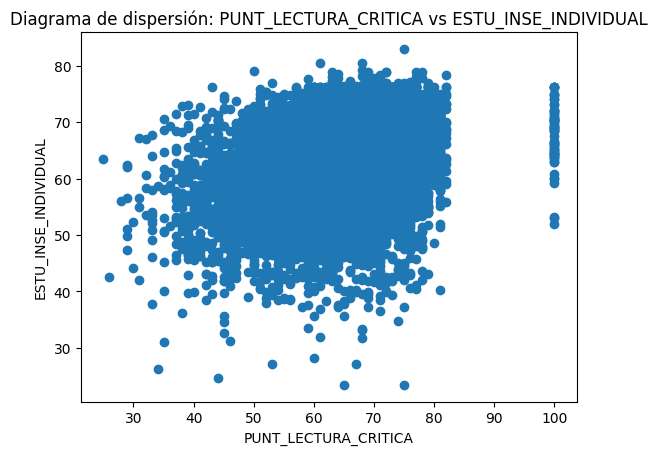

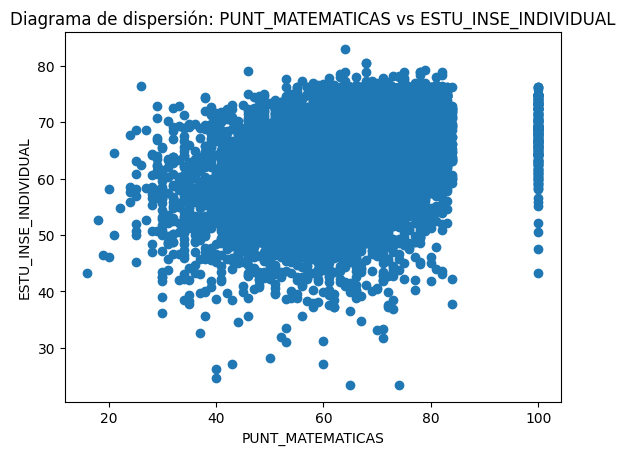

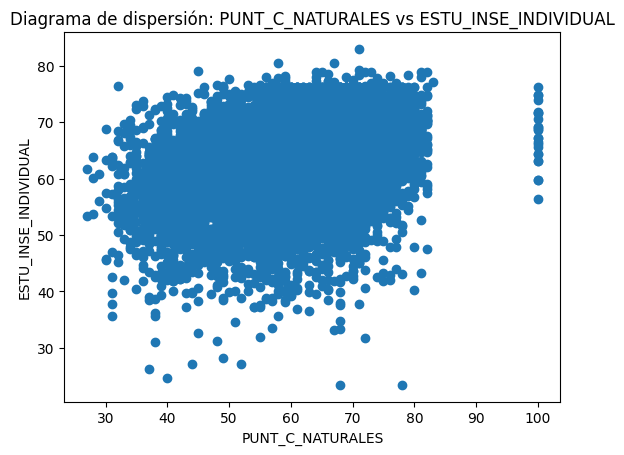

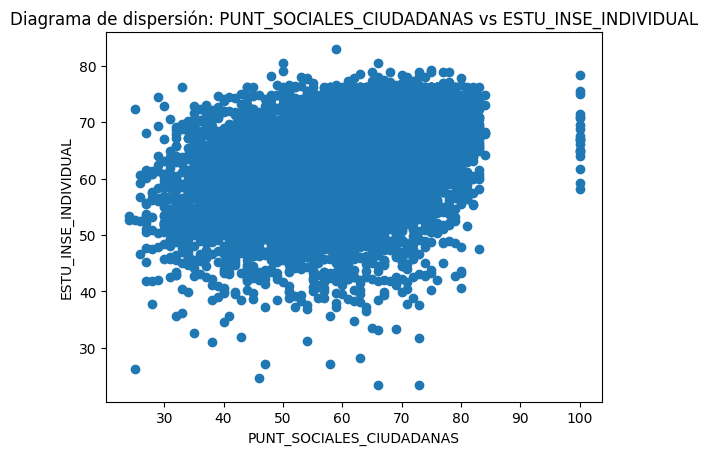

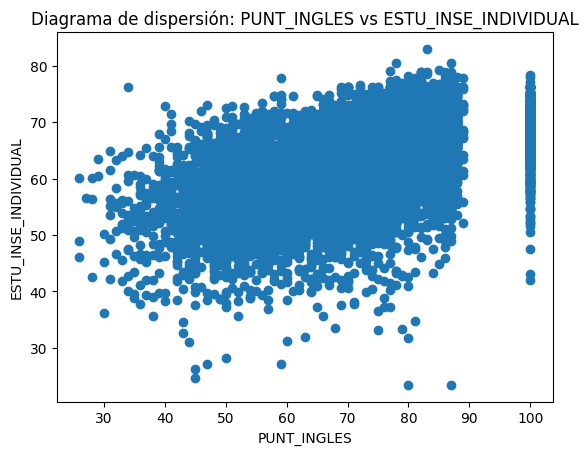

In [59]:
variables = ['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']
for var in variables:
    plt.scatter(icfes_sin_nan[var], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
    plt.title(f'Diagrama de dispersión: {var} vs ESTU_INSE_INDIVIDUAL')
    plt.xlabel(var)
    plt.ylabel('ESTU_INSE_INDIVIDUAL')
    plt.show()

### Selección de variables explicativas a partir de los coeficientes de correlación

In [69]:
for var in variables:
    pearson_corr = icfes_sin_nan['ESTU_INSE_INDIVIDUAL'].corr(icfes_sin_nan[var], method='pearson')
    kendall_corr = icfes_sin_nan['ESTU_INSE_INDIVIDUAL'].corr(icfes_sin_nan[var], method='kendall')
    spearman_corr = icfes_sin_nan['ESTU_INSE_INDIVIDUAL'].corr(icfes_sin_nan[var], method='spearman')
    print(f'Correlación de {var} con ESTU_INSE_INDIVIDUAL:\n    - Pearson: {pearson_corr}\n    - Kendall: {kendall_corr}\n    - Spearman: {spearman_corr}')

Correlación de PUNT_LECTURA_CRITICA con ESTU_INSE_INDIVIDUAL:
    - Pearson: 0.35477831154957695
    - Kendall: 0.24636724048204134
    - Spearman: 0.3575861775493282
Correlación de PUNT_MATEMATICAS con ESTU_INSE_INDIVIDUAL:
    - Pearson: 0.37666512872808017
    - Kendall: 0.2710503110002687
    - Spearman: 0.39393544035017275
Correlación de PUNT_C_NATURALES con ESTU_INSE_INDIVIDUAL:
    - Pearson: 0.3598554924882554
    - Kendall: 0.2505193571669217
    - Spearman: 0.36474626881201705
Correlación de PUNT_SOCIALES_CIUDADANAS con ESTU_INSE_INDIVIDUAL:
    - Pearson: 0.35726582942148083
    - Kendall: 0.24884271638677485
    - Spearman: 0.3624298456462429
Correlación de PUNT_INGLES con ESTU_INSE_INDIVIDUAL:
    - Pearson: 0.5511549003261873
    - Kendall: 0.39578544802151444
    - Spearman: 0.5657374840407321


Mediante el cálculo de los coeficientes de correlación, las variables `PUNT_INGLES` y `PUNT_MATEMATICAS` son las mejores variables candidatas para el modelo



### Regresión múltiple con división de datos

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
coefft= r2_score(y_test, y_pred)
print(f'Coeficiente de determinación en el conjunto de prueba: {coefft}')

Coeficiente de determinación en el conjunto de prueba: 0.31980835286299447


### Selección de variables explicativas a partir del coeficiente de determinación calculados a partir del modelo de regresión lineal múltiple

In [101]:
X = icfes_sin_nan[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
y = icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
for var in variables:
    X_mod = X.drop(var, axis=1)
    reg = LinearRegression().fit(X_mod, y)
    r_squared = reg.score(X_mod, y)
    resta= abs(r_squared-coefft)
    resultado= 'si' if resta > 0.0155 else 'no'
    print(f'Coeficiente de determinación excluyendo {var}: {r_squared}\n    Esta variable {resultado} es explicativa ({resta}).')

Coeficiente de determinación excluyendo PUNT_LECTURA_CRITICA: 0.3055919542731931
    Esta variable no es explicativa (0.014216398589801393).
Coeficiente de determinación excluyendo PUNT_MATEMATICAS: 0.30429071799511975
    Esta variable si es explicativa (0.015517634867874719).
Coeficiente de determinación excluyendo PUNT_C_NATURALES: 0.30596558322780376
    Esta variable no es explicativa (0.01384276963519071).
Coeficiente de determinación excluyendo PUNT_SOCIALES_CIUDADANAS: 0.30598446799577383
    Esta variable no es explicativa (0.013823884867220637).
Coeficiente de determinación excluyendo PUNT_INGLES: 0.1639011297346884
    Esta variable si es explicativa (0.15590722312830607).


Mediante este modelo, las variables `PUNT_INGLES` y `PUNT_MATEMATICAS` son las que mejor predicen la variable respuesta.

### Diagrama de dispersión con ciertas variables

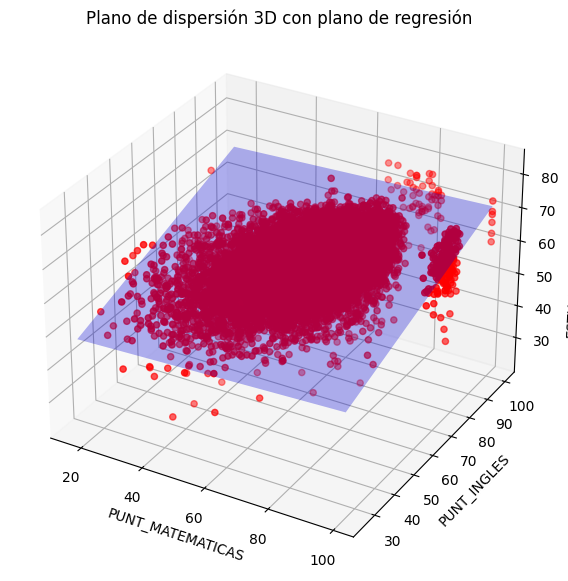

In [100]:
X_3d = icfes_sin_nan[['PUNT_MATEMATICAS', 'PUNT_INGLES']]
y_3d = icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
modelo_3d = LinearRegression()
modelo_3d.fit(X_3d, y_3d)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
x = icfes_sin_nan['PUNT_MATEMATICAS']
y = icfes_sin_nan['PUNT_LECTURA_CRITICA']
z = icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
ax.scatter(x, y, z, c='r', marker='o')
x_surf, y_surf = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
z_surf = modelo_3d.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, color='blue', alpha=0.3, rstride=100, cstride=100)
ax.set_xlabel('PUNT_MATEMATICAS')
ax.set_ylabel('PUNT_INGLES')
ax.set_zlabel('ESTU_INSE_INDIVIDUAL')
plt.title('Plano de dispersión 3D con plano de regresión')
plt.show()

### Modelos de regresión

#### Regresión múltiple con división de datos

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
coefft= r2_score(y_test, y_pred)
print(f'Coeficiente de determinación en el conjunto de prueba: {coefft}')

Coeficiente de determinación en el conjunto de prueba: 0.31980835286299447


#### Red neuronal de perceptrón multicapa

In [84]:
red = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100), max_iter=500, activation='relu', solver='adam', learning_rate='invscaling')
red.fit(X_train, y_train)
y_pred_red = red.predict(X_test)
print(f'Coeficiente de determinación en el conjunto de prueba (Red Neuronal): {r2_score(y_test, y_pred_red)}')

Coeficiente de determinación en el conjunto de prueba (Red Neuronal): 0.30479890931127784


Por tanto, el modelo más adecuado para trabajar es el de regresión múltiple con regresión de datos.

### Imputación de valores faltantes

In [91]:
icfes_connan = datos_icfes[(datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) & (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) & (~datos_icfes['PUNT_MATEMATICAS'].isna()) & (~datos_icfes['PUNT_C_NATURALES'].isna()) & (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) & (~datos_icfes['PUNT_INGLES'].isna())]
icfes_connan.loc[:, 'ESTU_INSE_INDIVIDUAL'] = model.predict(icfes_connan[variables_explicativas])
icfes_connan[variables].head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
ESTU_TIPODOCUMENTO,,,,,
TI,67,52,56,62,52.0
TI,63,62,70,62,57.0
TI,44,36,46,48,46.0
TI,54,65,46,59,55.0


Como el mejor modelo ajustado es el de regresión múltiple, se pueden predecir los valores faltantes del nivel socioeconómico para los estudiantes con datos faltantes en ESTU_INSE_INDIVIDUAL, asegurando que todos los estudiantes tengan una estimación basada en sus puntajes académicos.

## Conclusiones

Los hallazgos indican una conexión notable entre el rendimiento académico y el nivel socioeconómico. Esto sugiere que podría ser necesario implementar intervenciones en comunidades con menores recursos para optimizar el desempeño escolar de los estudiantes, centrándose especialmente en materias clave como matemáticas e inglés.

Además, este análisis subraya la relevancia de emplear métodos estadísticos sólidos para abordar datos ausentes y ofrecer predicciones precisas.